In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Dataset - 2019 Airbnb Data: 
#https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [4]:
#Questions to answer: 
#Which boroughs have most listings? 
#Which 5 neighbourhoods have most listings? 
#Which boroughs are most expensive? 
#Which neighbourhoods are most expensive? 
#Which room types are most expensive? 
#What boroughs have which room types? 
#How many hosts total? 
#Which hosts have the most listings and who is number 1? 

In [5]:
#Import file and put into dataframe
data = pd.read_csv("AB_NYC_2019.csv", low_memory=False)

In [6]:
#View Data as uploaded
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#See how much data we have
data.shape

(48895, 16)

In [8]:
#Take a look at the data 
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#Rename some columns 
new_names = {'name': 'listing_title',
             'neighbourhood_group' : 'borough',
             'number_of_reviews': 'num_of_reviews',
             'calculated_host_listings_count' : 'num_host_listings',
             'availability_365' : 'num_days_available',
             'minimum_nights' : 'min_nights'
            }

data.rename(columns = new_names, inplace = True)

In [10]:
data.head(5)

,id,listing_title,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,min_nights,num_of_reviews,last_review,reviews_per_month,num_host_listings,num_days_available
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
#drop columns: latitude, longitude, last review
data.drop(['latitude', 'longitude', 'last_review', 'num_days_available'], axis = 1, inplace = True)

In [12]:
data.head(5)

,id,listing_title,host_id,host_name,borough,neighbourhood,room_type,price,min_nights,num_of_reviews,reviews_per_month,num_host_listings
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1


In [13]:
data.shape

(48895, 12)

In [14]:
#Check for missing data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 48895 non-null  int64  
 1   listing_title      48879 non-null  object 
 2   host_id            48895 non-null  int64  
 3   host_name          48874 non-null  object 
 4   borough            48895 non-null  object 
 5   neighbourhood      48895 non-null  object 
 6   room_type          48895 non-null  object 
 7   price              48895 non-null  int64  
 8   min_nights         48895 non-null  int64  
 9   num_of_reviews     48895 non-null  int64  
 10  reviews_per_month  38843 non-null  float64
 11  num_host_listings  48895 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 4.5+ MB


In [15]:
#How much missing data and where? 
data.isnull().sum()

id                       0
listing_title           16
host_id                  0
host_name               21
borough                  0
neighbourhood            0
room_type                0
price                    0
min_nights               0
num_of_reviews           0
reviews_per_month    10052
num_host_listings        0
dtype: int64

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64
median: 0.72


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef3a74ad90>]],
      dtype=object)

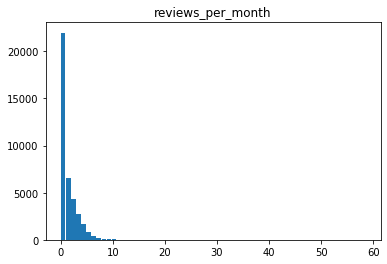

In [16]:
# Clean data (reviews per month) - fill null values with mean or median 
# First check reviews per month distribution to see if it's skewed and make decision from there 
print(data.reviews_per_month.describe())
print("median: " + str(data.reviews_per_month.median()))
data.hist(column = 'reviews_per_month', bins = 60, grid = False, rwidth = .9)

In [17]:
#Clean data- fill null values with median
data.fillna(data.reviews_per_month.median(), inplace=True)

In [18]:
#Make sure it worked 
data.isnull().sum()

id                   0
listing_title        0
host_id              0
host_name            0
borough              0
neighbourhood        0
room_type            0
price                0
min_nights           0
num_of_reviews       0
reviews_per_month    0
num_host_listings    0
dtype: int64

In [19]:
#Check for duplicates 
data.duplicated().sum()

0

In [20]:
#Examine values of categorical variables and make sure there's nothing like Brooklyn/brooklyn
data.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [21]:
#Make listing title, host_name, neighbourhood, boroughs and room_type lower case 
data['listing_title'].str.lower()
data['host_name'].str.lower()
data['borough'].str.lower()
data['neighbourhood'].str.lower()
data['room_type'].str.lower()

0           private room
1        entire home/apt
2           private room
3        entire home/apt
4        entire home/apt
              ...       
48890       private room
48891       private room
48892    entire home/apt
48893        shared room
48894       private room
Name: room_type, Length: 48895, dtype: object

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
median: 106.0


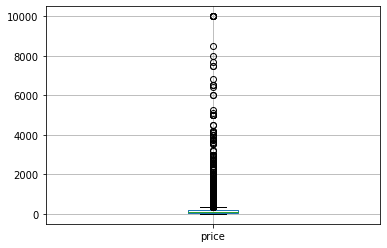

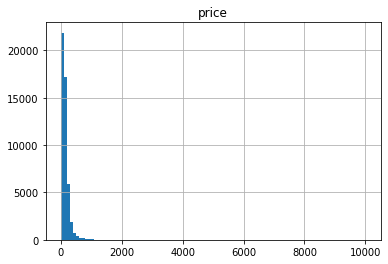

In [22]:
#Description, Box plot and histogram of price 
data.boxplot(column = 'price')
data.hist(column = 'price', bins = 100, grid = True,)
print(data.price.describe())
print("median: " + str(data.price.median()))

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: num_of_reviews, dtype: float64

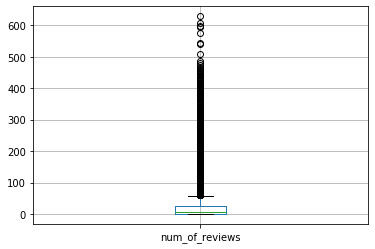

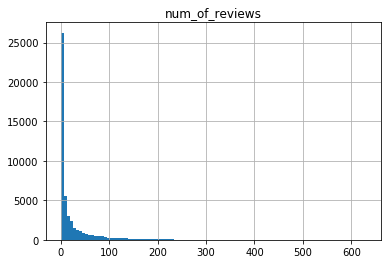

In [23]:
#Box plot and histogram of num_of_reviews 
data.boxplot(column = 'num_of_reviews')
data.hist(column = 'num_of_reviews', bins = 100, grid = True,)
data.num_of_reviews.describe()

count    48895.000000
mean         1.238930
std          1.520861
min          0.010000
25%          0.280000
50%          0.720000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

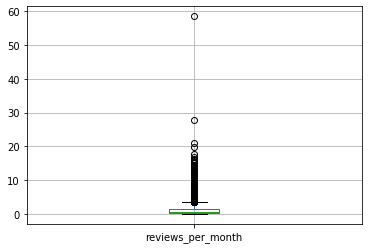

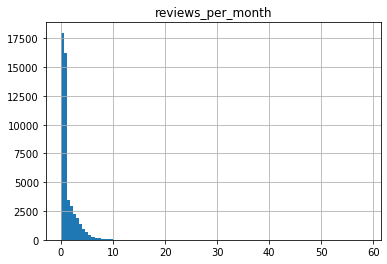

In [24]:
#Box plot and histogram of reviews_per_month
data.boxplot(column = 'reviews_per_month')
data.hist(column = 'reviews_per_month', bins = 100, grid = True,)
data.reviews_per_month.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: num_host_listings, dtype: float64
median: 1.0


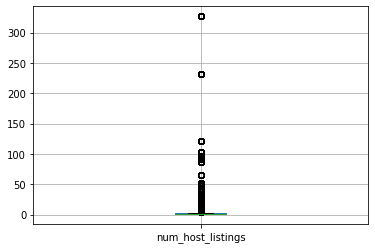

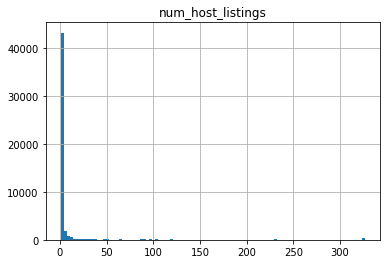

In [25]:
#Box plot and histogram of num_host_listings
data.boxplot(column = 'num_host_listings')
data.hist(column = 'num_host_listings', bins = 100, grid = True,)
print(data.num_host_listings.describe())
print("median: " + str(data.num_host_listings.median()))

In [26]:
#Questions to answer: 
#Which boroughs have most listings? 
#Which 5 neighbourhoods have most listings? 
#Which boroughs are most expensive? 
#Which neighbourhoods are most expensive? 
#Which room types are most expensive? 
#What boroughs have which room types? 
#How many hosts total? 
#Which hosts have the most listings and who are they?

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: borough, dtype: int64


<BarContainer object of 5 artists>

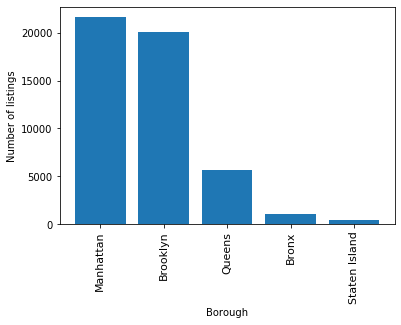

In [27]:
#Which boroughs have the most listings? 
borough_listings = data.borough.value_counts()
print(borough_listings)

borough_listing = data.borough.value_counts()
plt.figure()
x = list(borough_listing.index)
y = list(borough_listing.values)

plt.ylabel("Number of listings")
plt.xlabel("Borough")
plt.xticks(rotation ='vertical', size=11)

plt.bar(x,y)

<BarContainer object of 5 artists>

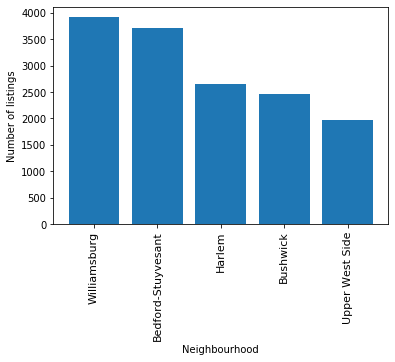

In [28]:
#Which 5 neighborhoods have most listings? 
data.neighbourhood.value_counts().head(5)

top_5_neighbourhoods = data.neighbourhood.value_counts().head(5)
plt.figure()
x = list(top_5_neighbourhoods.index)
y = list(top_5_neighbourhoods.values)

plt.ylabel("Number of listings")
plt.xlabel("Neighbourhood")
plt.xticks(rotation ='vertical', size=11)

plt.bar(x,y)

borough
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


<BarContainer object of 5 artists>

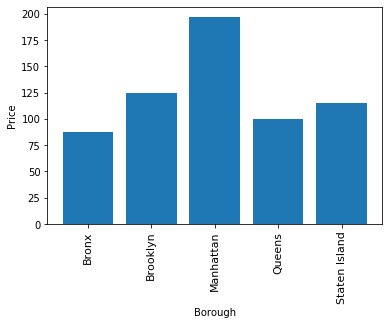

In [29]:
#Which boroughs are most expensive? - average price by borough
average_borough_prices = data.groupby('borough').price.mean()
print(average_borough_prices)

prices_by_borough = data.groupby('borough').price.mean()
plt.figure()
x = list(prices_by_borough.index)
y = list(prices_by_borough.values)

plt.ylabel("Price")
plt.xlabel("Borough")
plt.xticks(rotation ='vertical', size=11)

plt.bar(x,y)



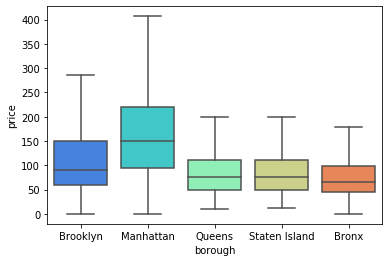

In [30]:
#Boxplot to show distribution
sns.boxplot(x='borough', y='price', data = data, palette='rainbow', showfliers=False)

neighbourhood
Allerton                       87.595238
Arden Heights                  67.250000
Arrochar                      115.000000
Arverne                       171.779221
Astoria                       117.187778
Bath Beach                     81.764706
Battery Park City             367.557143
Bay Ridge                     144.432624
Bay Terrace                   142.000000
Bay Terrace, Staten Island    102.500000
Name: price, dtype: float64


<BarContainer object of 10 artists>

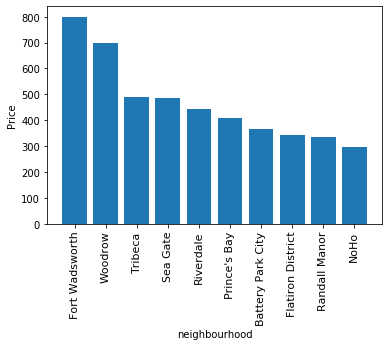

In [31]:
#Which neighbourhoods are most expensive? 
average_neighbourhood_prices = data.groupby('neighbourhood').price.mean().head(10)
print(average_neighbourhood_prices)

prices_by_neighbourhood = data.groupby('neighbourhood').price.mean().sort_values(ascending = False).head(10)
plt.figure()
x = list(prices_by_neighbourhood.index)
y = list(prices_by_neighbourhood.values)

plt.ylabel("Price")
plt.xlabel("neighbourhood")
plt.xticks(rotation ='vertical', size=11)

plt.bar(x,y)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


<BarContainer object of 3 artists>

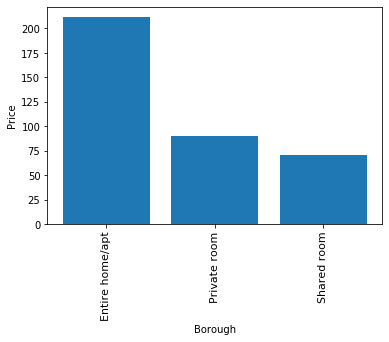

In [32]:
#Which room types are most expensive? - average by room type 
average_room_prices = data.groupby('room_type').price.mean()
print(average_room_prices)

prices_by_roomtype = data.groupby('room_type').price.mean()
plt.figure()
x = list(prices_by_roomtype.index)
y = list(prices_by_roomtype.values)

plt.ylabel("Price")
plt.xlabel("Borough")
plt.xticks(rotation ='vertical', size=11)

plt.bar(x,y)

In [33]:
#What boroughs have what room types? 
num_room_types_per_borough = data.groupby('borough').room_type.value_counts()
print(num_room_types_per_borough)


borough        room_type      
Bronx          Private room         652
               Entire home/apt      379
               Shared room           60
Brooklyn       Private room       10132
               Entire home/apt     9559
               Shared room          413
Manhattan      Entire home/apt    13199
               Private room        7982
               Shared room          480
Queens         Private room        3372
               Entire home/apt     2096
               Shared room          198
Staten Island  Private room         188
               Entire home/apt      176
               Shared room            9
Name: room_type, dtype: int64


In [34]:
#How many hosts do we have? 
len(data['host_id'].unique())

37457

In [43]:
#Which hosts have the most listings?

top_5_hosts = data.num_host_listings


0               John
1           Jennifer
2          Elisabeth
3        LisaRoxanne
4              Laura
            ...     
40973           Eyal
40975           Eyal
40976           Eyal
40977           Eyal
40978           Eyal
Name: host_name, Length: 470, dtype: object


In [ ]:
#Which neighbourhoods are most expensive? 
average_neighbourhood_prices = data.groupby('neighbourhood').price.mean().head(10)
print(average_neighbourhood_prices)

prices_by_neighbourhood = data.groupby('neighbourhood').price.mean().sort_values(ascending = False).head(10)
plt.figure()
x = list(prices_by_neighbourhood.index)
y = list(prices_by_neighbourhood.values)

plt.ylabel("Price")
plt.xlabel("neighbourhood")
plt.xticks(rotation ='vertical', size=11)

plt.bar(x,y)




/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


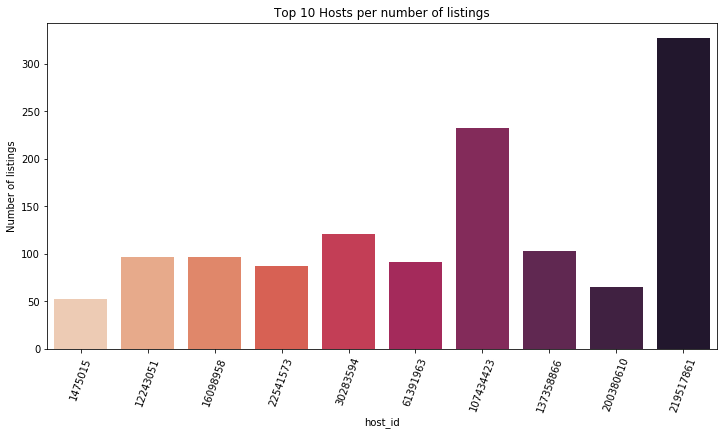

In [56]:
hosts = data.groupby(['host_id'])['id'].count().sort_values(ascending=False).reset_index().head(10)
hosts.rename(columns={'id':'Number of listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(hosts['host_id'],hosts['Number of listings'],palette='rocket_r');
plt.title('Top 10 Hosts per number of listings');
plt.xticks(rotation=70);

In [58]:
top_host = data[(data.host_id == 219517861)]
print(top_host)

             id                                      listing_title    host_id  \
38293  30181691      Sonder | 180 Water | Incredible 2BR + Rooftop  219517861   
38294  30181945         Sonder | 180 Water | Premier 1BR + Rooftop  219517861   
38588  30347708        Sonder | 180 Water | Charming 1BR + Rooftop  219517861   
39769  30937590            Sonder | The Nash | Artsy 1BR + Rooftop  219517861   
39770  30937591        Sonder | The Nash | Lovely Studio + Rooftop  219517861   
...         ...                                                ...        ...   
47691  35871510  Sonder | 116 John | Vibrant Studio + Fitness Room  219517861   
47692  35871511     Sonder | 116 John | Vibrant 1BR + Fitness Room  219517861   
47693  35871515         Sonder | 116 John | Stunning 1BR + Rooftop  219517861   
47814  35936418          Sonder | 116 John | Polished Studio + Gym  219517861   
47821  35937891            Sonder | 116 John | Simple Studio + Gym  219517861   

          host_name    boro

In [59]:
second_host = data[(data.host_id == 107)]
print(top_host)

             id                                      listing_title    host_id  \
38293  30181691      Sonder | 180 Water | Incredible 2BR + Rooftop  219517861   
38294  30181945         Sonder | 180 Water | Premier 1BR + Rooftop  219517861   
38588  30347708        Sonder | 180 Water | Charming 1BR + Rooftop  219517861   
39769  30937590            Sonder | The Nash | Artsy 1BR + Rooftop  219517861   
39770  30937591        Sonder | The Nash | Lovely Studio + Rooftop  219517861   
...         ...                                                ...        ...   
47691  35871510  Sonder | 116 John | Vibrant Studio + Fitness Room  219517861   
47692  35871511     Sonder | 116 John | Vibrant 1BR + Fitness Room  219517861   
47693  35871515         Sonder | 116 John | Stunning 1BR + Rooftop  219517861   
47814  35936418          Sonder | 116 John | Polished Studio + Gym  219517861   
47821  35937891            Sonder | 116 John | Simple Studio + Gym  219517861   

          host_name    boro